## Лабораторная работа по курсу "Искусственный интеллект"
## Многослойный персептрон

| Студент | Тимофеев А. В. |
|---------|--------|
| Группа  | 7      |
|Вариант| 1 |
|Фреймворк| PyTorch |



In [1]:
import pickle
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import numpy as np

## Подготовка датасетов
Объявим функции для анализа датасетов

Теперь загружаем датасет:

In [2]:
def count_of_keys(df):
    unique = np.unique(df)
    counts = np.zeros(len(unique), dtype=np.int32)
    for v in df:
        counts[v] += 1
    return counts
def visualization_of_counts(df):
    counts = count_of_keys(df)
    plt.ylabel("Кол-во элементов в классе")
    plt.xlabel("Номер каждого класса")
    plt.bar(np.arange(len(counts)), counts)
    plt.xticks(np.arange(len(counts)), [i for i in range(len(counts))])
def analyze(labels, features, string :str):
    visualization_of_counts(labels)
    print("Данные для [{}]".format(string))
    print("Количество элементов в датасете : {}".format(len(labels)))
    print("Количество атрибутов в элементе : {}".format(len(features[0])))
    print("Минимальное значение атрибута   : {}".format(np.min(features)))
    print("Максимальное значение атрибута  : {}".format(np.max(features)))
    print()

### Готовим датасеты

#### MNIST

In [3]:
with open('mnist.pkl', 'rb') as mnist_pickle:
    MNIST = pickle.load(mnist_pickle)

Смотрим на то, какие данные получились:

Данные для [MNIST]
Количество элементов в датасете : 42000
Количество атрибутов в элементе : 784
Минимальное значение атрибута   : 0
Максимальное значение атрибута  : 255

Данные для [Обучающая выборка из MNIST]
Количество элементов в датасете : 33600
Количество атрибутов в элементе : 784
Минимальное значение атрибута   : 0.0
Максимальное значение атрибута  : 1.0

Данные для [Тестировочная выборка из MNIST]
Количество элементов в датасете : 8400
Количество атрибутов в элементе : 784
Минимальное значение атрибута   : 0.0
Максимальное значение атрибута  : 1.0



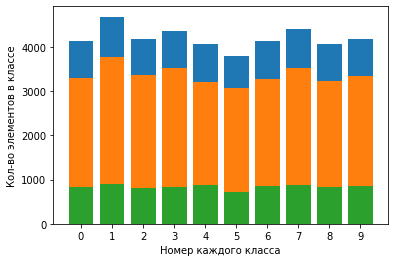

In [4]:
def conv_df(df):
    return np.array(df).astype(np.float32)/255

analyze(MNIST['Train']['Labels'], MNIST['Train']['Features'], "MNIST")

features = conv_df(MNIST['Train']['Features'])
labels = MNIST['Train']['Labels']

mnist_train_x, mnist_test_x, mnist_train_y, mnist_test_y = train_test_split(features,labels,test_size=0.2)

analyze(mnist_train_y, mnist_train_x, "Обучающая выборка из MNIST")
analyze(mnist_test_y, mnist_test_x, "Тестировочная выборка из MNIST")

#### FashionMNIST

In [5]:
%cd fashion-mnist/utils
import mnist_reader
%cd ..
fashion_mnist_train_x_raw, fashion_mnist_train_y = mnist_reader.load_mnist('data/fashion', kind='train')
fashion_mnist_test_x_raw, fashion_mnist_test_y = mnist_reader.load_mnist('data/fashion', kind='t10k')
%cd ..

d:\education\education\AI\lab_perceptron-gearwheels\fashion-mnist\utils
d:\education\education\AI\lab_perceptron-gearwheels\fashion-mnist
d:\education\education\AI\lab_perceptron-gearwheels


Данные для [Обучающая выборка из Fashion MNIST]
Количество элементов в датасете : 60000
Количество атрибутов в элементе : 784
Минимальное значение атрибута   : 0
Максимальное значение атрибута  : 255

Данные для [Тестировочная выборка из Fashion MNIST]
Количество элементов в датасете : 10000
Количество атрибутов в элементе : 784
Минимальное значение атрибута   : 0
Максимальное значение атрибута  : 255



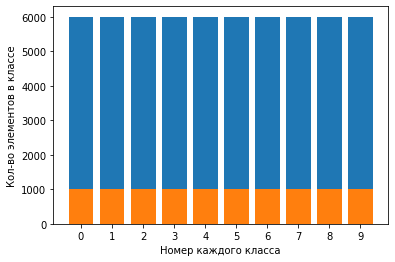

In [6]:
analyze(fashion_mnist_train_y, fashion_mnist_train_x_raw, "Обучающая выборка из Fashion MNIST")
analyze(fashion_mnist_test_y, fashion_mnist_test_x_raw, "Тестировочная выборка из Fashion MNIST")

In [7]:
fashion_mnist_train_x = conv_df(fashion_mnist_train_x_raw)
fashion_mnist_test_x  = conv_df(fashion_mnist_test_x_raw)

#### CIFAR-10

In [8]:
def unpickle_cifar(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
test_batch = unpickle_cifar('cifar-10-batches-py/test_batch')
data_batch_1 = unpickle_cifar('cifar-10-batches-py/data_batch_1')
data_batch_2 = unpickle_cifar('cifar-10-batches-py/data_batch_2')
data_batch_3 = unpickle_cifar('cifar-10-batches-py/data_batch_3')
data_batch_4 = unpickle_cifar('cifar-10-batches-py/data_batch_4')
data_batch_5 = unpickle_cifar('cifar-10-batches-py/data_batch_5')

In [9]:
print(test_batch.keys())
print(data_batch_1.keys())
print(test_batch[b'labels'])
print(test_batch[b'data'])
print(test_batch[b'data'][0])
print(len(test_batch[b'data'][0]))

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9, 5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9, 7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7, 8, 9, 0, 3, 8, 6, 4, 6, 6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6, 8, 7, 4, 0, 6, 2, 1, 3, 0, 4, 2, 7, 8, 3, 1, 2, 8, 0, 8, 3, 5, 2, 4, 1, 8, 9, 1, 2, 9, 7, 2, 9, 6, 5, 6, 3, 8, 7, 6, 2, 5, 2, 8, 9, 6, 0, 0, 5, 2, 9, 5, 4, 2, 1, 6, 6, 8, 4, 8, 4, 5, 0, 9, 9, 9, 8, 9, 9, 3, 7, 5, 0, 0, 5, 2, 2, 3, 8, 6, 3, 4, 0, 5, 8, 0, 1, 7, 2, 8, 8, 7, 8, 5, 1, 8, 7, 1, 3, 0, 5, 7, 9, 7, 4, 5, 9, 8, 0, 7, 9, 8, 2, 7, 6, 9, 4, 3, 9, 6, 4, 7, 6, 5, 1, 5, 8, 8, 0, 4, 0, 5, 5, 1, 1, 8, 9, 0, 3, 1, 9, 2, 2, 5, 3, 9, 9, 4, 0, 3, 0, 0, 9, 8, 1, 5, 7, 0, 8, 2, 4, 7, 0, 2, 3, 6, 3, 8, 5, 0, 3, 4, 3, 9, 0, 6, 1, 0, 9, 1, 0, 7, 9, 1, 2,

In [10]:
print("Кол-во элементов в test_batch   : {}".format(len(test_batch[b'labels'])))
print("Кол-во элементов в data_batch_1 : {}".format(len(data_batch_1[b'labels'])))
print("Кол-во элементов в data_batch_2 : {}".format(len(data_batch_2[b'labels'])))
print("Кол-во элементов в data_batch_3 : {}".format(len(data_batch_3[b'labels'])))
print("Кол-во элементов в data_batch_4 : {}".format(len(data_batch_4[b'labels'])))
print("Кол-во элементов в data_batch_5 : {}".format(len(data_batch_5[b'labels'])))

Кол-во элементов в test_batch   : 10000
Кол-во элементов в data_batch_1 : 10000
Кол-во элементов в data_batch_2 : 10000
Кол-во элементов в data_batch_3 : 10000
Кол-во элементов в data_batch_4 : 10000
Кол-во элементов в data_batch_5 : 10000


In [11]:
def append_list_to_list(list1, list2):
    for value in list2:
        list1.append(value)

cifar_train_x_raw = []
cifar_train_y     = []

append_list_to_list(cifar_train_x_raw, data_batch_1[b'data'])
append_list_to_list(cifar_train_x_raw, data_batch_2[b'data'])
append_list_to_list(cifar_train_x_raw, data_batch_3[b'data'])
append_list_to_list(cifar_train_x_raw, data_batch_4[b'data'])
append_list_to_list(cifar_train_x_raw, data_batch_5[b'data'])

append_list_to_list(cifar_train_y, data_batch_5[b'labels'])
append_list_to_list(cifar_train_y, data_batch_5[b'labels'])
append_list_to_list(cifar_train_y, data_batch_5[b'labels'])
append_list_to_list(cifar_train_y, data_batch_5[b'labels'])
append_list_to_list(cifar_train_y, data_batch_5[b'labels'])

cifar_test_x_raw = test_batch[b'data']
cifar_test_y     = test_batch[b'labels']

Данные для [Обчающая выборка CIFAR-10]
Количество элементов в датасете : 50000
Количество атрибутов в элементе : 3072
Минимальное значение атрибута   : 0
Максимальное значение атрибута  : 255

Данные для [Тестировочная выборка CIFAR-10]
Количество элементов в датасете : 10000
Количество атрибутов в элементе : 3072
Минимальное значение атрибута   : 0
Максимальное значение атрибута  : 255



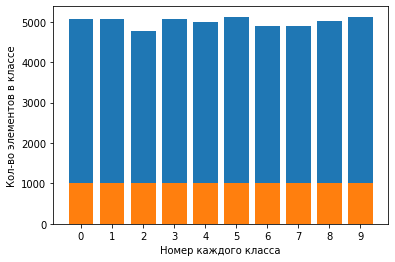

In [12]:
analyze(cifar_train_y, cifar_train_x_raw, "Обчающая выборка CIFAR-10")
analyze(cifar_test_y, cifar_test_x_raw, "Тестировочная выборка CIFAR-10")

Данные для [Тестовая выборка CIFAR-10]
Количество элементов в датасете : 10000
Количество атрибутов в элементе : 1024
Минимальное значение атрибута   : 0.0
Максимальное значение атрибута  : 1.0

Размер тестовой выборки  : 10000
Размер обучающей выборки : 50000
Размер датасета CIFAR-10 : 60000


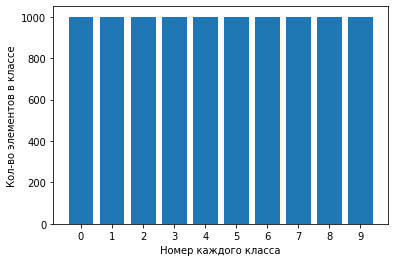

In [13]:
def conv_cifar(X):
    df = np.array(X).astype(np.float32)
    result = np.zeros(len(df) * len(df[0])//3, dtype=np.float32)
    i = 0
    for v in df:
        for j in range(0, len(v), 3):
            result[i] = (v[j] + v[j+1] + v[j+2])/765
            i += 1
    return np.reshape(result ,(len(df), len(df[0])//3))


cifar_test_x  = conv_cifar(cifar_test_x_raw)
cifar_train_x = conv_cifar(cifar_train_x_raw)
analyze(cifar_test_y,cifar_test_x,"Тестовая выборка CIFAR-10")
print('Размер тестовой выборки  : {}'.format(len(cifar_test_x)))
print('Размер обучающей выборки : {}'.format(len(cifar_train_x)))
print('Размер датасета CIFAR-10 : {}'.format(len(cifar_test_x) + len(cifar_train_x)))

### Персептрон на фреймворке PyTorch

In [14]:
import re


class PyTorchPerceptron(torch.nn.Module):
    def __init__(self, layers=[10], func=torch.nn.Sigmoid(), 
                 loss_func=torch.nn.functional.binary_cross_entropy_with_logits, 
                 epochs=10, learning_rate=0.001):
        super().__init__()
        self.layers=layers
        self.func=func
        self.epochs=epochs
        self.learning_rate=learning_rate
        self.level=0
        self.loss_function=loss_func
        
    def fit(self, X, Y, valid_X, valid_Y):
        self.create_net(X,Y)
        
        
        self.level = 0
        self.status_print("Обучение сети:")
        self.level += 1
        
        self.train(X, Y, valid_X, valid_Y)
        return self
    
    def status_print(self, msg, level=-1):
        if level == -1:
            level = self.level
        print("  "*level + msg)
        
    def create_net(self, X, Y):
        self.level=0
        layers_settings = self.layers.copy()
        layers_settings.insert(0, len(X[0]))
        layers_settings.append(len(np.unique(Y)))
        self.classes_count = layers_settings[-1]
        module_layers = []
        
        self.status_print("Создание сети :")
        self.level += 1
        self.status_print("Количество скрытых слоев     : {}".format(len(layers_settings)-2))
        self.status_print("Количество входных нейронов  : {}".format(layers_settings[0]))
        self.status_print("Koличество выходных нейронов : {}".format(layers_settings[-1]))
        self.status_print("Широты скрытых слоев         : {}".format(self.layers))
        self.level -= 1
        
        for i in range(len(layers_settings)-2):
            module_layers.append(torch.nn.Linear(layers_settings[i], layers_settings[i+1]))
            module_layers.append(self.func)
            
        module_layers.append(torch.nn.Linear(layers_settings[-2], layers_settings[-1]))
        self.net = torch.nn.Sequential(*module_layers)
        return self

    def getDataLoad(self, X, Y):
        val_x = torch.tensor(np.array(X).astype(np.float32))
        val_y = []
        for y in Y:
            val = np.zeros(self.classes_count)
            for i in range(10):
                val[i] = 1 if i == y else 0
            val_y.append(val.copy().astype(np.float32))
        dataset = torch.utils.data.TensorDataset(val_x,torch.tensor(val_y,dtype=torch.float32))
        dataloader = torch.utils.data.DataLoader(dataset,batch_size=16)

        return dataloader

    def train(self, X, Y, valid_X, valid_Y):
        training_accuracy_for_plot = []
        validation_accuracy_for_plot = []

        dataloader = self.getDataLoad(X, Y)
        valid_dataloader = self.getDataLoad(valid_X, valid_Y)

        optim = torch.optim.Adam(self.net.parameters(),lr=self.learning_rate)
        print("|training|\t\t\t\t\t\t\t|validation|")
        for epoch in range(1, self.epochs+1):
            for (x,y) in dataloader:
                z = self.net(x)
                loss = self.loss_function(z,y)
                optim.zero_grad()
                loss.backward()
                optim.step()
            acc = self.score(X, Y)
            training_accuracy_for_plot.append(acc) 

            for (x,y) in valid_dataloader:
                z = self.net(x)
                valid_loss = self.loss_function(z,y)
            valid_acc = self.score(valid_X, valid_Y)
            validation_accuracy_for_plot.append(valid_acc)
                
            self.status_print("[epochs {} in {}] loss : {}, accuracy : {}\t\t [epochs {} in {}] loss : {}, accuracy : {}".format(
                epoch, self.epochs, round(loss.item(), 5), round(acc, 5), epoch, self.epochs, round(valid_loss.item(), 5), round(valid_acc, 5)))

        plt.plot(range(1,self.epochs+1), training_accuracy_for_plot, 'g-')
        plt.plot(range(1,self.epochs+1), validation_accuracy_for_plot, 'h--')
        plt.legend(['Training accuracy', 'Validation accuracy'], loc='lower center', ncol = 2)
        plt.xlim([0,self.epochs])
        plt.ylim([0,1])
        plt.show()
                
    def score(self, X, Y):
        val_x = torch.tensor(np.array(X).astype(np.float32))
        answer = self.net(val_x)
        results = [ np.argmax(v.detach().numpy()) for v in self.func(answer)]
        total_success = 0
        for res, y in zip(results, Y):
            if res == y:
                total_success += 1
        acc = total_success / len(Y)
        return acc
    def confusion_matrix(self, X, Y):
        val_x = torch.tensor(np.array(X).astype(np.float32))
        answer = self.net(val_x)
        results = [ np.argmax(v.detach().numpy()) for v in self.func(answer)]
        matrix = np.zeros((self.classes_count, self.classes_count), dtype=np.int32)
        for res, y in zip(results, Y):
            matrix[res][y] += 1
        return matrix
        

## Тестирование MNIST
## Однослойные персептроны

Возьмём функцию активации Sigmoid, кол-во внутренних слоев: 0

Создание сети :
  Количество скрытых слоев     : 0
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : []
Обучение сети:


<ipython-input-14-dfecddc66ce3>:64: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:204.)
  dataset = torch.utils.data.TensorDataset(val_x,torch.tensor(val_y,dtype=torch.float32))


|training|							|validation|
  [epochs 1 in 10] loss : 0.06822, accuracy : 0.89655		 [epochs 1 in 10] loss : 0.12912, accuracy : 0.9
  [epochs 2 in 10] loss : 0.05909, accuracy : 0.90839		 [epochs 2 in 10] loss : 0.12612, accuracy : 0.90964
  [epochs 3 in 10] loss : 0.05658, accuracy : 0.91307		 [epochs 3 in 10] loss : 0.12517, accuracy : 0.91333
  [epochs 4 in 10] loss : 0.05527, accuracy : 0.91568		 [epochs 4 in 10] loss : 0.12463, accuracy : 0.91571
  [epochs 5 in 10] loss : 0.05435, accuracy : 0.9183		 [epochs 5 in 10] loss : 0.12433, accuracy : 0.91619
  [epochs 6 in 10] loss : 0.0536, accuracy : 0.92015		 [epochs 6 in 10] loss : 0.12425, accuracy : 0.9175
  [epochs 7 in 10] loss : 0.05297, accuracy : 0.9214		 [epochs 7 in 10] loss : 0.12439, accuracy : 0.9181
  [epochs 8 in 10] loss : 0.05241, accuracy : 0.92283		 [epochs 8 in 10] loss : 0.12473, accuracy : 0.91821
  [epochs 9 in 10] loss : 0.05192, accuracy : 0.92384		 [epochs 9 in 10] loss : 0.12526, accuracy : 0.91881
  [epoc

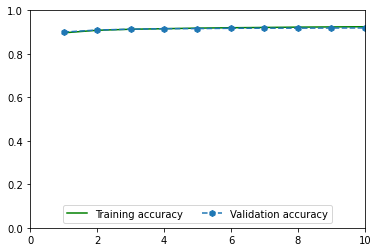

PyTorchPerceptron(
  (func): Sigmoid()
  (net): Sequential(
    (0): Linear(in_features=784, out_features=10, bias=True)
  )
)

In [15]:
first_null_layered_perceptron = PyTorchPerceptron(layers=[])
first_null_layered_perceptron.fit(mnist_train_x, mnist_train_y, mnist_test_x, mnist_test_y) 

Изменим функцию активации на функцию ReLU, количество внутренних слоев все еще 0

Создание сети :
  Количество скрытых слоев     : 0
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : []
Обучение сети:
|training|							|validation|
  [epochs 1 in 10] loss : 0.06692, accuracy : 0.81729		 [epochs 1 in 10] loss : 0.12871, accuracy : 0.81583
  [epochs 2 in 10] loss : 0.05812, accuracy : 0.84315		 [epochs 2 in 10] loss : 0.12571, accuracy : 0.8425
  [epochs 3 in 10] loss : 0.05573, accuracy : 0.85304		 [epochs 3 in 10] loss : 0.12474, accuracy : 0.85071
  [epochs 4 in 10] loss : 0.05452, accuracy : 0.85807		 [epochs 4 in 10] loss : 0.1242, accuracy : 0.85417
  [epochs 5 in 10] loss : 0.05367, accuracy : 0.86131		 [epochs 5 in 10] loss : 0.12391, accuracy : 0.85738
  [epochs 6 in 10] loss : 0.05299, accuracy : 0.86473		 [epochs 6 in 10] loss : 0.12385, accuracy : 0.85929
  [epochs 7 in 10] loss : 0.05241, accuracy : 0.86693		 [epochs 7 in 10] loss : 0.12401, accuracy : 0.86119
  [epochs 8 in 10] loss : 0.0519, accurac

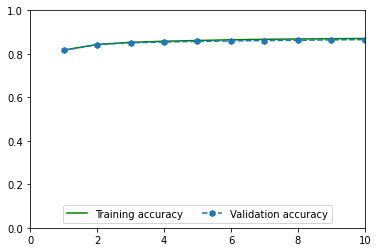

PyTorchPerceptron(
  (func): ReLU()
  (net): Sequential(
    (0): Linear(in_features=784, out_features=10, bias=True)
  )
)

In [16]:
second_null_layered_perceptron = PyTorchPerceptron(layers=[], func=torch.nn.ReLU())
second_null_layered_perceptron.fit(mnist_train_x, mnist_train_y, mnist_test_x, mnist_test_y)

Изменим функцию активации с функции ReLU на Tanh, количество внутренних слоев по-прежнему 0

Создание сети :
  Количество скрытых слоев     : 0
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : []
Обучение сети:
|training|							|validation|
  [epochs 1 in 10] loss : 0.0678, accuracy : 0.89604		 [epochs 1 in 10] loss : 0.12935, accuracy : 0.89917
  [epochs 2 in 10] loss : 0.05865, accuracy : 0.90789		 [epochs 2 in 10] loss : 0.12648, accuracy : 0.91
  [epochs 3 in 10] loss : 0.05621, accuracy : 0.9125		 [epochs 3 in 10] loss : 0.12554, accuracy : 0.91357
  [epochs 4 in 10] loss : 0.05499, accuracy : 0.91568		 [epochs 4 in 10] loss : 0.12501, accuracy : 0.91548
  [epochs 5 in 10] loss : 0.05413, accuracy : 0.91845		 [epochs 5 in 10] loss : 0.12473, accuracy : 0.91619
  [epochs 6 in 10] loss : 0.05345, accuracy : 0.92009		 [epochs 6 in 10] loss : 0.12469, accuracy : 0.91738
  [epochs 7 in 10] loss : 0.05286, accuracy : 0.92173		 [epochs 7 in 10] loss : 0.12485, accuracy : 0.91833
  [epochs 8 in 10] loss : 0.05234, accuracy 

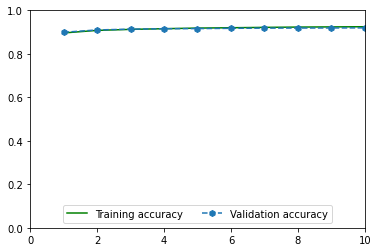

PyTorchPerceptron(
  (func): Tanh()
  (net): Sequential(
    (0): Linear(in_features=784, out_features=10, bias=True)
  )
)

In [17]:
third_null_layered_perceptron = PyTorchPerceptron(layers=[], func=torch.nn.Tanh())
third_null_layered_perceptron.fit(mnist_train_x, mnist_train_y, mnist_test_x, mnist_test_y)

## Двуслойные персептроны

Снова функция активации у нас Tanh, но количество внутренних слоев уже равняется 1, широты : 30

Создание сети :
  Количество скрытых слоев     : 1
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [30]
Обучение сети:
|training|							|validation|
  [epochs 1 in 10] loss : 0.06837, accuracy : 0.91554		 [epochs 1 in 10] loss : 0.0961, accuracy : 0.91274
  [epochs 2 in 10] loss : 0.05266, accuracy : 0.93369		 [epochs 2 in 10] loss : 0.09239, accuracy : 0.92607
  [epochs 3 in 10] loss : 0.04803, accuracy : 0.94369		 [epochs 3 in 10] loss : 0.09346, accuracy : 0.9306
  [epochs 4 in 10] loss : 0.04598, accuracy : 0.94917		 [epochs 4 in 10] loss : 0.09136, accuracy : 0.93512
  [epochs 5 in 10] loss : 0.04591, accuracy : 0.95342		 [epochs 5 in 10] loss : 0.0903, accuracy : 0.9369
  [epochs 6 in 10] loss : 0.04584, accuracy : 0.95688		 [epochs 6 in 10] loss : 0.08926, accuracy : 0.9394
  [epochs 7 in 10] loss : 0.04614, accuracy : 0.95991		 [epochs 7 in 10] loss : 0.09233, accuracy : 0.94
  [epochs 8 in 10] loss : 0.04506, accuracy :

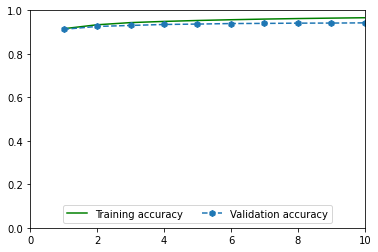

PyTorchPerceptron(
  (func): Tanh()
  (net): Sequential(
    (0): Linear(in_features=784, out_features=30, bias=True)
    (1): Tanh()
    (2): Linear(in_features=30, out_features=10, bias=True)
  )
)

In [18]:
second_one_layred_perceptron = PyTorchPerceptron(layers=[30], func=torch.nn.Tanh())
second_one_layred_perceptron.fit(mnist_train_x, mnist_train_y, mnist_test_x, mnist_test_y)

Берём функцию активации Sigmoid, и сеть с тем же количеством скрытых слоев и нейронов в нем 

Создание сети :
  Количество скрытых слоев     : 1
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [30]
Обучение сети:
|training|							|validation|
  [epochs 1 in 10] loss : 0.0843, accuracy : 0.89735		 [epochs 1 in 10] loss : 0.11815, accuracy : 0.89917
  [epochs 2 in 10] loss : 0.05261, accuracy : 0.91866		 [epochs 2 in 10] loss : 0.10294, accuracy : 0.9156
  [epochs 3 in 10] loss : 0.04446, accuracy : 0.92848		 [epochs 3 in 10] loss : 0.10208, accuracy : 0.925
  [epochs 4 in 10] loss : 0.04018, accuracy : 0.93747		 [epochs 4 in 10] loss : 0.101, accuracy : 0.93036
  [epochs 5 in 10] loss : 0.03742, accuracy : 0.94399		 [epochs 5 in 10] loss : 0.09836, accuracy : 0.93369
  [epochs 6 in 10] loss : 0.03574, accuracy : 0.9486		 [epochs 6 in 10] loss : 0.09529, accuracy : 0.93702
  [epochs 7 in 10] loss : 0.03471, accuracy : 0.95217		 [epochs 7 in 10] loss : 0.09178, accuracy : 0.94024
  [epochs 8 in 10] loss : 0.03385, accuracy 

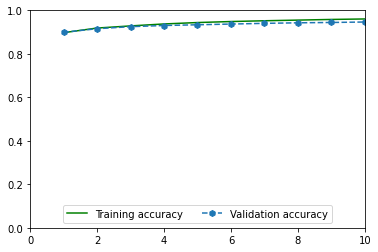

PyTorchPerceptron(
  (func): Sigmoid()
  (net): Sequential(
    (0): Linear(in_features=784, out_features=30, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=30, out_features=10, bias=True)
  )
)

In [19]:
third_one_layred_perceptron = PyTorchPerceptron(layers=[30])
third_one_layred_perceptron.fit(mnist_train_x, mnist_train_y, mnist_test_x, mnist_test_y)

## Трехслойные персептроны

Функция активации Tanh, количество внутренних слоев 2, широты : 30, 20

Создание сети :
  Количество скрытых слоев     : 2
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [30, 20]
Обучение сети:
|training|							|validation|
  [epochs 1 in 10] loss : 0.07576, accuracy : 0.91571		 [epochs 1 in 10] loss : 0.09588, accuracy : 0.90976
  [epochs 2 in 10] loss : 0.04754, accuracy : 0.94351		 [epochs 2 in 10] loss : 0.07193, accuracy : 0.93226
  [epochs 3 in 10] loss : 0.03, accuracy : 0.95494		 [epochs 3 in 10] loss : 0.05923, accuracy : 0.94
  [epochs 4 in 10] loss : 0.019, accuracy : 0.96125		 [epochs 4 in 10] loss : 0.0617, accuracy : 0.94345
  [epochs 5 in 10] loss : 0.01407, accuracy : 0.9661		 [epochs 5 in 10] loss : 0.06327, accuracy : 0.94655
  [epochs 6 in 10] loss : 0.01182, accuracy : 0.96935		 [epochs 6 in 10] loss : 0.05741, accuracy : 0.94833
  [epochs 7 in 10] loss : 0.01115, accuracy : 0.97336		 [epochs 7 in 10] loss : 0.05682, accuracy : 0.9494
  [epochs 8 in 10] loss : 0.01172, accuracy 

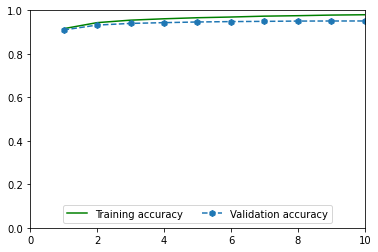

PyTorchPerceptron(
  (func): Tanh()
  (net): Sequential(
    (0): Linear(in_features=784, out_features=30, bias=True)
    (1): Tanh()
    (2): Linear(in_features=30, out_features=20, bias=True)
    (3): Tanh()
    (4): Linear(in_features=20, out_features=10, bias=True)
  )
)

In [20]:
first_double_layred_perceptron = PyTorchPerceptron(layers=[30, 20], func=torch.nn.Tanh())
first_double_layred_perceptron.fit(mnist_train_x, mnist_train_y, mnist_test_x, mnist_test_y)

Функция активации опять Sigmoid, количество внутренних слоев 2, широты : 20, 15

Создание сети :
  Количество скрытых слоев     : 2
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [20, 15]
Обучение сети:
|training|							|validation|
  [epochs 1 in 10] loss : 0.19621, accuracy : 0.66253		 [epochs 1 in 10] loss : 0.2259, accuracy : 0.6544
  [epochs 2 in 10] loss : 0.11564, accuracy : 0.86929		 [epochs 2 in 10] loss : 0.13938, accuracy : 0.86536
  [epochs 3 in 10] loss : 0.07074, accuracy : 0.9069		 [epochs 3 in 10] loss : 0.0907, accuracy : 0.90095
  [epochs 4 in 10] loss : 0.05666, accuracy : 0.92286		 [epochs 4 in 10] loss : 0.0676, accuracy : 0.91702
  [epochs 5 in 10] loss : 0.04883, accuracy : 0.93324		 [epochs 5 in 10] loss : 0.05925, accuracy : 0.92476
  [epochs 6 in 10] loss : 0.04377, accuracy : 0.94006		 [epochs 6 in 10] loss : 0.05666, accuracy : 0.93095
  [epochs 7 in 10] loss : 0.03887, accuracy : 0.94568		 [epochs 7 in 10] loss : 0.05429, accuracy : 0.93381
  [epochs 8 in 10] loss : 0.03332, acc

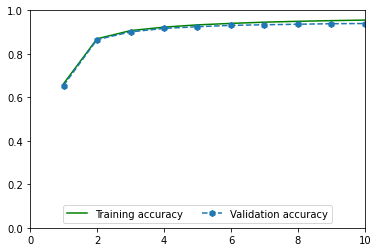

PyTorchPerceptron(
  (func): Sigmoid()
  (net): Sequential(
    (0): Linear(in_features=784, out_features=20, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=20, out_features=15, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=15, out_features=10, bias=True)
  )
)

In [21]:
second_double_layred_perceptron = PyTorchPerceptron(layers=[20, 15])
second_double_layred_perceptron.fit(mnist_train_x, mnist_train_y, mnist_test_x, mnist_test_y)

А теперь возьмём функцию активации Softsign, количество внутренних слоев снова 2, широты : 20, 15

Создание сети :
  Количество скрытых слоев     : 2
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [20, 15]
Обучение сети:
|training|							|validation|
  [epochs 1 in 10] loss : 0.2158, accuracy : 0.70113		 [epochs 1 in 10] loss : 0.22344, accuracy : 0.70488
  [epochs 2 in 10] loss : 0.08068, accuracy : 0.89342		 [epochs 2 in 10] loss : 0.11708, accuracy : 0.88536
  [epochs 3 in 10] loss : 0.05882, accuracy : 0.92185		 [epochs 3 in 10] loss : 0.08528, accuracy : 0.91155
  [epochs 4 in 10] loss : 0.04481, accuracy : 0.93381		 [epochs 4 in 10] loss : 0.0545, accuracy : 0.9225
  [epochs 5 in 10] loss : 0.02777, accuracy : 0.94095		 [epochs 5 in 10] loss : 0.06456, accuracy : 0.92857
  [epochs 6 in 10] loss : 0.02318, accuracy : 0.94729		 [epochs 6 in 10] loss : 0.05667, accuracy : 0.93286
  [epochs 7 in 10] loss : 0.02396, accuracy : 0.95113		 [epochs 7 in 10] loss : 0.05264, accuracy : 0.93536
  [epochs 8 in 10] loss : 0.02236, a

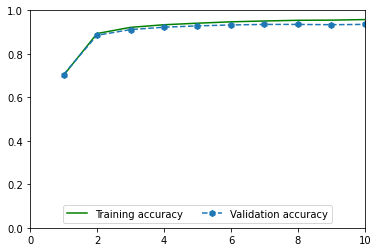

PyTorchPerceptron(
  (func): Softsign()
  (net): Sequential(
    (0): Linear(in_features=784, out_features=20, bias=True)
    (1): Softsign()
    (2): Linear(in_features=20, out_features=15, bias=True)
    (3): Softsign()
    (4): Linear(in_features=15, out_features=10, bias=True)
  )
)

In [22]:
fourth_double_layred_perceptron = PyTorchPerceptron(layers=[20, 15], func=torch.nn.Softsign())
fourth_double_layred_perceptron.fit(mnist_train_x, mnist_train_y, mnist_test_x, mnist_test_y)

## Тестирование FashionMNIST
### Однослойные персептроны
Функция активации по-прежнему Softsign, количество внутренних слоев 0

Создание сети :
  Количество скрытых слоев     : 0
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : []
Обучение сети:
|training|							|validation|
  [epochs 1 in 20] loss : 0.09116, accuracy : 0.8296		 [epochs 1 in 20] loss : 0.06819, accuracy : 0.8175
  [epochs 2 in 20] loss : 0.08335, accuracy : 0.84168		 [epochs 2 in 20] loss : 0.06208, accuracy : 0.8285
  [epochs 3 in 20] loss : 0.07947, accuracy : 0.84735		 [epochs 3 in 20] loss : 0.0599, accuracy : 0.8325
  [epochs 4 in 20] loss : 0.07707, accuracy : 0.85043		 [epochs 4 in 20] loss : 0.05895, accuracy : 0.8344
  [epochs 5 in 20] loss : 0.07542, accuracy : 0.8525		 [epochs 5 in 20] loss : 0.05853, accuracy : 0.8358
  [epochs 6 in 20] loss : 0.07419, accuracy : 0.85402		 [epochs 6 in 20] loss : 0.05838, accuracy : 0.8366
  [epochs 7 in 20] loss : 0.07323, accuracy : 0.85545		 [epochs 7 in 20] loss : 0.05836, accuracy : 0.8367
  [epochs 8 in 20] loss : 0.07244, accuracy : 0.8

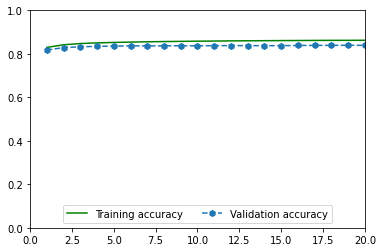

PyTorchPerceptron(
  (func): Softsign()
  (net): Sequential(
    (0): Linear(in_features=784, out_features=10, bias=True)
  )
)

In [23]:
first_null_layred_fm_perceptron = PyTorchPerceptron(layers=[], func=torch.nn.Softsign(), epochs=20)
first_null_layred_fm_perceptron.fit(fashion_mnist_train_x, fashion_mnist_train_y, fashion_mnist_test_x, fashion_mnist_test_y)

Изменим функцию активации на Sigmoid, количество внутренних слоев 0

Создание сети :
  Количество скрытых слоев     : 0
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : []
Обучение сети:
|training|							|validation|
  [epochs 1 in 20] loss : 0.09138, accuracy : 0.82983		 [epochs 1 in 20] loss : 0.06789, accuracy : 0.8174
  [epochs 2 in 20] loss : 0.08345, accuracy : 0.84187		 [epochs 2 in 20] loss : 0.06165, accuracy : 0.8279
  [epochs 3 in 20] loss : 0.07953, accuracy : 0.84773		 [epochs 3 in 20] loss : 0.05949, accuracy : 0.8326
  [epochs 4 in 20] loss : 0.07713, accuracy : 0.85052		 [epochs 4 in 20] loss : 0.05859, accuracy : 0.8348
  [epochs 5 in 20] loss : 0.07547, accuracy : 0.85247		 [epochs 5 in 20] loss : 0.05823, accuracy : 0.8355
  [epochs 6 in 20] loss : 0.07425, accuracy : 0.85408		 [epochs 6 in 20] loss : 0.05814, accuracy : 0.8369
  [epochs 7 in 20] loss : 0.07329, accuracy : 0.85567		 [epochs 7 in 20] loss : 0.05818, accuracy : 0.8375
  [epochs 8 in 20] loss : 0.0725, accuracy : 0

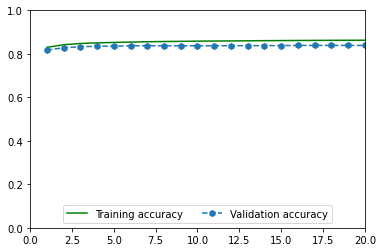

PyTorchPerceptron(
  (func): Sigmoid()
  (net): Sequential(
    (0): Linear(in_features=784, out_features=10, bias=True)
  )
)

In [24]:
second_null_layred_fm_perceptron = PyTorchPerceptron(layers=[], epochs=20)
second_null_layred_fm_perceptron.fit(fashion_mnist_train_x, fashion_mnist_train_y, fashion_mnist_test_x, fashion_mnist_test_y)

Функция активации теперь Tanh, количество внутренних слоев : 0

Создание сети :
  Количество скрытых слоев     : 0
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : []
Обучение сети:
|training|							|validation|
  [epochs 1 in 10] loss : 0.09123, accuracy : 0.8296		 [epochs 1 in 10] loss : 0.06483, accuracy : 0.8162
  [epochs 2 in 10] loss : 0.08327, accuracy : 0.84165		 [epochs 2 in 10] loss : 0.05922, accuracy : 0.8282
  [epochs 3 in 10] loss : 0.07932, accuracy : 0.84757		 [epochs 3 in 10] loss : 0.05734, accuracy : 0.8324
  [epochs 4 in 10] loss : 0.0769, accuracy : 0.85048		 [epochs 4 in 10] loss : 0.05661, accuracy : 0.8342
  [epochs 5 in 10] loss : 0.07523, accuracy : 0.85233		 [epochs 5 in 10] loss : 0.05637, accuracy : 0.8353
  [epochs 6 in 10] loss : 0.074, accuracy : 0.85358		 [epochs 6 in 10] loss : 0.05637, accuracy : 0.8367
  [epochs 7 in 10] loss : 0.07303, accuracy : 0.85552		 [epochs 7 in 10] loss : 0.05649, accuracy : 0.8368
  [epochs 8 in 10] loss : 0.07225, accuracy : 0.85

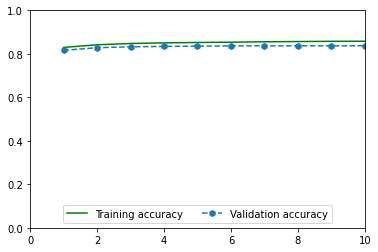

PyTorchPerceptron(
  (func): Tanh()
  (net): Sequential(
    (0): Linear(in_features=784, out_features=10, bias=True)
  )
)

In [25]:
second_null_layred_fm_perceptron = PyTorchPerceptron(layers=[], func=torch.nn.Tanh())
second_null_layred_fm_perceptron.fit(fashion_mnist_train_x, fashion_mnist_train_y, fashion_mnist_test_x, fashion_mnist_test_y)

## Двуслойные персептроны
Функция активации Sigmoid, количество внутренних слоев : 1, широты : 30

Создание сети :
  Количество скрытых слоев     : 1
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [30]
Обучение сети:
|training|							|validation|
  [epochs 1 in 20] loss : 0.07554, accuracy : 0.8299		 [epochs 1 in 20] loss : 0.05545, accuracy : 0.8195
  [epochs 2 in 20] loss : 0.05921, accuracy : 0.85208		 [epochs 2 in 20] loss : 0.04737, accuracy : 0.8411
  [epochs 3 in 20] loss : 0.05043, accuracy : 0.86313		 [epochs 3 in 20] loss : 0.04393, accuracy : 0.8481
  [epochs 4 in 20] loss : 0.04453, accuracy : 0.8693		 [epochs 4 in 20] loss : 0.04068, accuracy : 0.8529
  [epochs 5 in 20] loss : 0.04049, accuracy : 0.87435		 [epochs 5 in 20] loss : 0.03831, accuracy : 0.8563
  [epochs 6 in 20] loss : 0.03893, accuracy : 0.87797		 [epochs 6 in 20] loss : 0.03755, accuracy : 0.8586
  [epochs 7 in 20] loss : 0.03617, accuracy : 0.88125		 [epochs 7 in 20] loss : 0.03654, accuracy : 0.8612
  [epochs 8 in 20] loss : 0.03319, accuracy : 

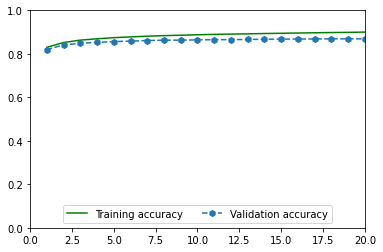

PyTorchPerceptron(
  (func): Sigmoid()
  (net): Sequential(
    (0): Linear(in_features=784, out_features=30, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=30, out_features=10, bias=True)
  )
)

In [26]:
first_one_layred_fm_perceptron = PyTorchPerceptron(layers=[30], epochs=20)
first_one_layred_fm_perceptron.fit(fashion_mnist_train_x, fashion_mnist_train_y, fashion_mnist_test_x, fashion_mnist_test_y)

Функция активации Sigmoid, количество внутренних слоев : 1, широты : 50

Создание сети :
  Количество скрытых слоев     : 1
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [50]
Обучение сети:
|training|							|validation|
  [epochs 1 in 20] loss : 0.06871, accuracy : 0.84183		 [epochs 1 in 20] loss : 0.04932, accuracy : 0.8309
  [epochs 2 in 20] loss : 0.05162, accuracy : 0.8628		 [epochs 2 in 20] loss : 0.0458, accuracy : 0.8493
  [epochs 3 in 20] loss : 0.04273, accuracy : 0.87278		 [epochs 3 in 20] loss : 0.04508, accuracy : 0.8574
  [epochs 4 in 20] loss : 0.03558, accuracy : 0.87993		 [epochs 4 in 20] loss : 0.04451, accuracy : 0.861
  [epochs 5 in 20] loss : 0.03217, accuracy : 0.88378		 [epochs 5 in 20] loss : 0.04433, accuracy : 0.8656
  [epochs 6 in 20] loss : 0.03044, accuracy : 0.88705		 [epochs 6 in 20] loss : 0.04418, accuracy : 0.8675
  [epochs 7 in 20] loss : 0.02909, accuracy : 0.89065		 [epochs 7 in 20] loss : 0.04415, accuracy : 0.8689
  [epochs 8 in 20] loss : 0.02754, accuracy : 0

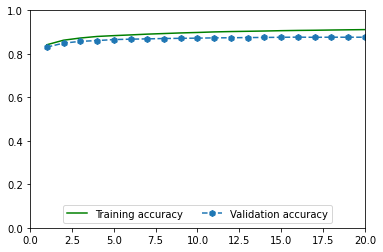

PyTorchPerceptron(
  (func): Sigmoid()
  (net): Sequential(
    (0): Linear(in_features=784, out_features=50, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=50, out_features=10, bias=True)
  )
)

In [27]:
second_one_layred_fm_perceptron = PyTorchPerceptron(layers=[50], epochs=20)
second_one_layred_fm_perceptron.fit(fashion_mnist_train_x, fashion_mnist_train_y, fashion_mnist_test_x, fashion_mnist_test_y)


Функция активации ReLU, количество внутренних слоев : 1, широты : 100

Создание сети :
  Количество скрытых слоев     : 1
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [100]
Обучение сети:
|training|							|validation|
  [epochs 1 in 20] loss : 0.07029, accuracy : 0.82753		 [epochs 1 in 20] loss : 0.05156, accuracy : 0.8177
  [epochs 2 in 20] loss : 0.05357, accuracy : 0.84513		 [epochs 2 in 20] loss : 0.04906, accuracy : 0.8331
  [epochs 3 in 20] loss : 0.04387, accuracy : 0.85805		 [epochs 3 in 20] loss : 0.04434, accuracy : 0.8379
  [epochs 4 in 20] loss : 0.0399, accuracy : 0.86988		 [epochs 4 in 20] loss : 0.04554, accuracy : 0.8491
  [epochs 5 in 20] loss : 0.03586, accuracy : 0.87378		 [epochs 5 in 20] loss : 0.04471, accuracy : 0.8534
  [epochs 6 in 20] loss : 0.02821, accuracy : 0.87965		 [epochs 6 in 20] loss : 0.04356, accuracy : 0.8561
  [epochs 7 in 20] loss : 0.03028, accuracy : 0.8804		 [epochs 7 in 20] loss : 0.0473, accuracy : 0.855
  [epochs 8 in 20] loss : 0.02844, accuracy : 0

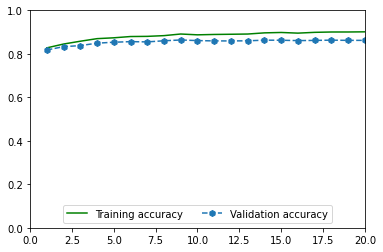

PyTorchPerceptron(
  (func): ReLU()
  (net): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [28]:
third_one_layred_fm_perceptron = PyTorchPerceptron(layers=[100], epochs=20, func=torch.nn.ReLU())
third_one_layred_fm_perceptron.fit(fashion_mnist_train_x, fashion_mnist_train_y, fashion_mnist_test_x, fashion_mnist_test_y)


### Тестирование CIFAR-10

Функция активации Tanh, количество внутренних слоев : 2, широты : 324, 100

Создание сети :
  Количество скрытых слоев     : 2
  Количество входных нейронов  : 1024
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [324, 100]
Обучение сети:
|training|							|validation|
  [epochs 1 in 50] loss : 0.31356, accuracy : 0.1274		 [epochs 1 in 50] loss : 0.3027, accuracy : 0.237
  [epochs 2 in 50] loss : 0.31188, accuracy : 0.13674		 [epochs 2 in 50] loss : 0.28632, accuracy : 0.2821
  [epochs 3 in 50] loss : 0.31455, accuracy : 0.14276		 [epochs 3 in 50] loss : 0.27946, accuracy : 0.3077
  [epochs 4 in 50] loss : 0.31799, accuracy : 0.14792		 [epochs 4 in 50] loss : 0.27165, accuracy : 0.3296
  [epochs 5 in 50] loss : 0.3188, accuracy : 0.14998		 [epochs 5 in 50] loss : 0.26389, accuracy : 0.3499
  [epochs 6 in 50] loss : 0.31648, accuracy : 0.15304		 [epochs 6 in 50] loss : 0.25841, accuracy : 0.3618
  [epochs 7 in 50] loss : 0.31643, accuracy : 0.15502		 [epochs 7 in 50] loss : 0.25572, accuracy : 0.3703
  [epochs 8 in 50] loss : 0.31485, accura

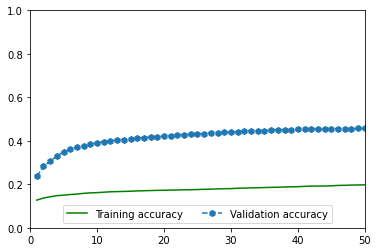

PyTorchPerceptron(
  (func): Tanh()
  (net): Sequential(
    (0): Linear(in_features=1024, out_features=324, bias=True)
    (1): Tanh()
    (2): Linear(in_features=324, out_features=100, bias=True)
    (3): Tanh()
    (4): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [29]:
first_null_cf_perceptron = PyTorchPerceptron(layers=[324, 100], learning_rate=0.0001, epochs=50, func=torch.nn.Tanh())
first_null_cf_perceptron.fit(cifar_train_x, cifar_train_y, cifar_test_x, cifar_test_y)

In [30]:
print("Confusion matrix :")
print(first_null_cf_perceptron.confusion_matrix(cifar_test_x, cifar_test_y))

Confusion matrix :
[[420  13  82  26  46  20   4  30  47  15]
 [ 47 580  35  40  24  37  28  28  60 183]
 [ 35   8 216  36 103  38  43  32   5   5]
 [ 33  28 139 366  90 258 134  91  36  31]
 [ 20  11 109  25 308  42  78  53   7   6]
 [ 21  14  94 195  74 325  64  62  18  10]
 [ 26  18 150 109 140  96 546  47  13  31]
 [ 42  33  91  64 121  94  34 509  19  37]
 [274  97  48  47  55  47  21  39 718 100]
 [ 82 198  36  92  39  43  48 109  77 582]]


Функция активации Tanh, количество внутренних слоев : 0

Создание сети :
  Количество скрытых слоев     : 0
  Количество входных нейронов  : 1024
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : []
Обучение сети:
|training|							|validation|
  [epochs 1 in 50] loss : 0.32932, accuracy : 0.13024		 [epochs 1 in 50] loss : 0.29895, accuracy : 0.2421
  [epochs 2 in 50] loss : 0.3287, accuracy : 0.13726		 [epochs 2 in 50] loss : 0.2958, accuracy : 0.2607
  [epochs 3 in 50] loss : 0.32836, accuracy : 0.1395		 [epochs 3 in 50] loss : 0.29443, accuracy : 0.2719
  [epochs 4 in 50] loss : 0.32804, accuracy : 0.14122		 [epochs 4 in 50] loss : 0.29353, accuracy : 0.2779
  [epochs 5 in 50] loss : 0.32775, accuracy : 0.14216		 [epochs 5 in 50] loss : 0.29284, accuracy : 0.2812
  [epochs 6 in 50] loss : 0.32747, accuracy : 0.14308		 [epochs 6 in 50] loss : 0.29227, accuracy : 0.2845
  [epochs 7 in 50] loss : 0.32721, accuracy : 0.144		 [epochs 7 in 50] loss : 0.29177, accuracy : 0.2872
  [epochs 8 in 50] loss : 0.32696, accuracy : 0.14

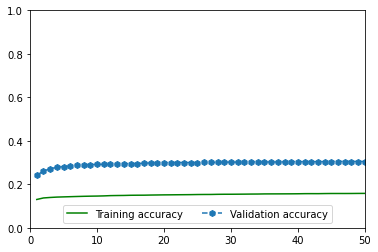

PyTorchPerceptron(
  (func): Tanh()
  (net): Sequential(
    (0): Linear(in_features=1024, out_features=10, bias=True)
  )
)

In [31]:
second_null_cf_perceptron = PyTorchPerceptron(layers=[], learning_rate=0.0001, epochs=50, func=torch.nn.Tanh())
second_null_cf_perceptron.fit(cifar_train_x, cifar_train_y, cifar_test_x, cifar_test_y)

In [32]:
print("Confusion matrix :")
print(second_null_cf_perceptron.confusion_matrix(cifar_test_x, cifar_test_y))

Confusion matrix :
[[247  25  74  27  47  18  14  34  43  38]
 [ 53 399  58  72  52  49  79  56  77 143]
 [  2   2  14   8  12   3   7   4   0   1]
 [140  92 270 354 281 283 340 167  74  61]
 [  1   0  16   4  44   6  12  14   0   1]
 [ 44  63 159 272 150 368 164 141  53  39]
 [ 12  21  94  35 125  29 216  22   2  24]
 [ 48  45 112  54 157  96  60 316   9  38]
 [387 208 164  98  95 106  66 108 664 232]
 [ 66 145  39  76  37  42  42 138  78 423]]


### Итоги тестирования

Итоговая таблица тестрования нейросетей различной конфигурации для различных датасетов. 

| Кол-во слоев | Широты | Фун-я активации | Скорость обучения | Кол-во эпох | Тестовая точность (%) | Датасет |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| 1| 784| ReLU| 0.001| 10| 91| MNIST |
| 1| 784|Tanh| 0.001| 10| 91| MNIST |
| 1| 784| Sigmoid| 0.001| 10| 85| MNIST|
| 2| 784-30| Tanh| 0.001| 10| 94| MNIST |
| 2| 784-30|Sigmoid| 0.001| 10| 88| MNIST|
| 3| 784-30-20| Tanh| 0.001| 10| 95| MNIST |
| 3| 784-20-15| Sigmoid| 0.001| 10| 93| MNIST |
| 3| 784-20-15| Softsign| 0.001| 10| 93| MNIST |
| 1| 784 | Softsign| 0.001| 25| 83| FashionMNIST |
|1| 784 | Sigmoid | 0.001| 20| 83| FashionMNIST |
| 1| 784 | Tanh | 0.001| 10| 83| FashionMNIST |
| 2| 784-30 | Sigmoid | 0.001| 20| 87| FashionMNIST |
|2| 784-50 | Sigmoid | 0.001| 20| 87| FashionMNIST|
| 2| 784-100 | ReLU | 0.001| 20| 86| FashionMNIST |
| 1| 1024 | Tanh | 0.0001| 50| 30| CIFAR-10|
| 3| 1024-324-100| Tanh | 0.0001| 50| 45| CIFAR-10|

Confusion maxtrix 

In [33]:
print('Confusion matrix MNIST')
print(third_null_layered_perceptron.confusion_matrix(mnist_test_x, mnist_test_y))
print()
print('Confusion matrix FashionMNIST')
print(second_one_layred_fm_perceptron.confusion_matrix(fashion_mnist_test_x, fashion_mnist_test_y))

Confusion matrix MNIST
[[818   0   3   5   1  14   3   4   5   7]
 [  0 878   8   4   2   2   2   4  10   2]
 [  3   6 741  33   6   2  19  10  11   3]
 [  1   1  12 743   1  37   0   4  36  15]
 [  1   1   9   0 811   9   6   7   2  22]
 [  3   4   7  16   2 606   8   1  16   8]
 [  6   2   8   3   4   9 810   1   5   0]
 [  0   0  10   6   0   2   1 817   3  26]
 [  4   8  16  16   7  26   5   1 738  11]
 [  1   1   3   9  33  17   0  27   7 762]]

Confusion matrix FashionMNIST
[[843   4  17  22   1   0 146   0   3   0]
 [  0 957   4   7   1   0   3   0   0   0]
 [ 14   4 788   9  90   0 106   0   6   0]
 [ 46  26  14 903  39   1  39   0   5   0]
 [  5   6 117  32 827   0  80   0   2   0]
 [  1   0   0   0   0 953   0  21   3   5]
 [ 78   2  56  22  41   0 610   0   4   1]
 [  0   0   0   0   0  29   0 963   4  45]
 [ 13   1   4   5   1   1  16   0 973   1]
 [  0   0   0   0   0  16   0  16   0 948]]


## Вывод

В данной лабораторной работе я реализовал нейросеть с использованием фреймворка для создания нейросетей PyTorch.

Далее я решил задачу классификации для датасетов MNIST, FashionMNIST и CIFAR-10 с помощью 1, 2 и 3-слойного персептрона. Закономерности которые удалось установить в ходе решения:
* передаточные функции Tanh и ReLU, обычно, обеспечивают точность классификации больше чем функции Sigmoid и Softsign
* с увеличением количества нейронов в слоях и количества самих скрытых слоев, улучшается показатель точности классификации,но при этом  увеличивается время обучения нейросети
* задача классификации для CIFAR-10 не решается точнее 45% с помощью нейросети данного типа

Максимальная точность классификации датасетов нейросетью составила 94% для MNIST и 87% для FashionMNIST соответственно. Данные результаты удовлетворяют условиям поставленным в лабораторной работе, а вот для датасета CIFAR-10 точность не столь высока. Вероятно, стоило бы попробовать свёрточные нейросети, которые могут "рассмотреть" более широкую картину.